<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('iris.csv')

In [2]:
# Split features and labels
X = df.iloc[:, :-1].values
y = LabelEncoder().fit_transform(df['species'])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define activation functions and solvers
activations = ['logistic', 'tanh', 'relu']
optimizers = ['adam', 'sgd']
results = {}

In [6]:
# Train models
for act in activations:
    for opt in optimizers:
        mlp = MLPClassifier(
            hidden_layer_sizes=(5,),
            activation=act,
            solver=opt,
            max_iter=400,
            learning_rate_init=0.01,
            random_state=42
        )
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[(act, opt)] = (mlp.loss_curve_, acc)
# Display accuracy results
for key, value in results.items():
    print(f"Activation: {key[0]}, Optimizer: {key[1]}, Accuracy: {value[1]:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: logistic, Optimizer: adam, Accuracy: 1.0000
Activation: logistic, Optimizer: sgd, Accuracy: 0.9333
Activation: tanh, Optimizer: adam, Accuracy: 1.0000
Activation: tanh, Optimizer: sgd, Accuracy: 0.9667
Activation: relu, Optimizer: adam, Accuracy: 1.0000
Activation: relu, Optimizer: sgd, Accuracy: 0.9667


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


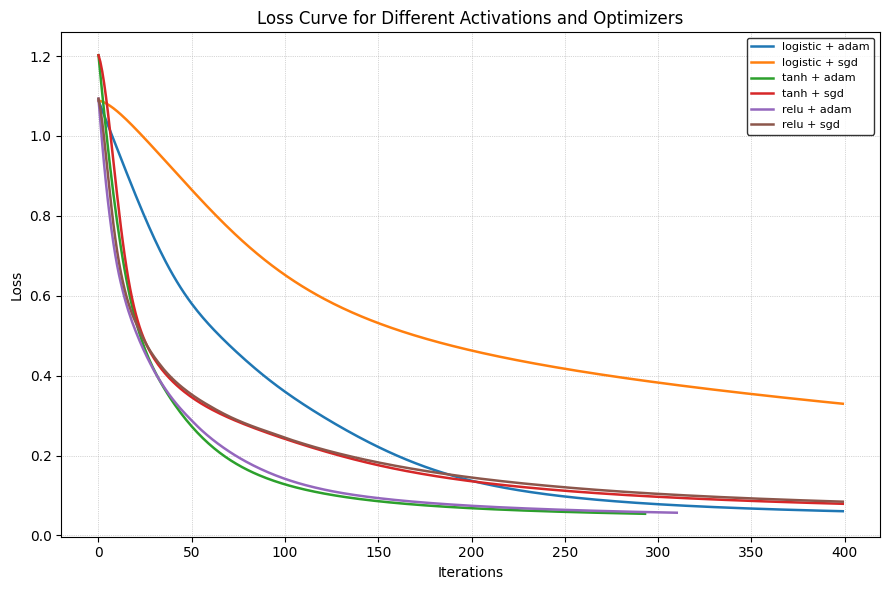

In [7]:
# Plot loss curves
plt.figure(figsize=(9,6))
for key, value in results.items():
    plt.plot(value[0], label=f'{key[0]} + {key[1]}', linewidth=1.8)
plt.title('Loss Curve for Different Activations and Optimizers')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(frameon=True, edgecolor='black', fontsize=8)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

In [8]:
# Select best model
best_key = max(results, key=lambda k: results[k][1])
best_act, best_opt = best_key
print("Best Model:", best_act, "+", best_opt)

# Retrain best model
best_model = MLPClassifier(
    hidden_layer_sizes=(5,),
    activation=best_act,
    solver=best_opt,
    max_iter=400,
    learning_rate_init=0.01,
    random_state=42
)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

Best Model: logistic + adam


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



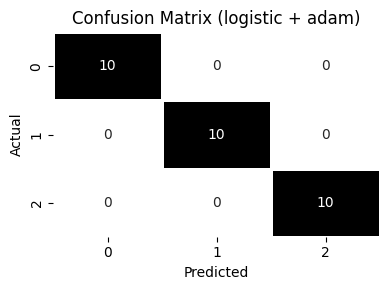

In [9]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Plot confusion matrix with modern view
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', cbar=False, linewidths=1)
plt.title(f'Confusion Matrix ({best_act} + {best_opt})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()